In [25]:
from bs4 import BeautifulSoup

import sqlite3
from sys import argv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import json
import requests

In [21]:
URL = "https://www.olx.pl/nieruchomosci/mieszkania/wynajem/warszawa/"
page = get(URL)
bs = BeautifulSoup(page.content, 'html.parser')

In [33]:
def parse_price(price):
  return float(price.replace(' ', '').replace('zł', '').replace(',', '.'))
dane = {'location':[],'title':[],'price':[],'link':[], 'metraz':[]}
df_dane = pd.DataFrame(dane)
for number in range(1,41):
  page = get(f'{URL}&page={number}')
  for offer in bs.find_all('div', class_='offer-wrapper'):
    footer = offer.find('td', class_='bottom-cell')
    try:
      location = footer.find('small', class_='breadcrumb').get_text().strip().split(',')[1]
    except:
      break
    title = offer.find('strong').get_text().strip()
    link = offer.find('a')
    price = parse_price(offer.find('p', class_='price').get_text().strip())
    
    url1 = link['href']
    html_data = requests.get(url1).text
    try:
      data = re.search(r'{"key":"m","name":"Powierzchnia","value":".+ m²"', html_data).group(0)
      data = data +"}"
      dict = eval(data)
      res = [int(i) for i in dict['value'].split() if i.isdigit()]
    except:
      try:
        html_data = requests.get(url1).text
        data = re.search(r'{"key":"m","value":".+","label":"Powierzchnia","localizedValue":".+ m²"', html_data).group(0)
        data = data +"}"
        dict = eval(data)
        res = [int(i) for i in dict['value'].split() if i.isdigit()]
      except Exception as e:
        break
    

    new_row= {'location':location,'title':title,'price':price,'link':link['href'],'metraz':res}
    df_dane = df_dane.append(new_row, ignore_index=True)




print(df_dane)

<div class="offer-wrapper">
<table cellpadding="0" cellspacing="0" class="fixed breakword ad_idKbRiZ" data-id="682537973" summary="Ogłoszenie" width="100%">
<tbody>
<tr>
<td class="photo-cell" rowspan="2" width="150">
<a class="thumb vtop inlblk rel tdnone linkWithHash scale4 detailsLink " href="https://www.otodom.pl/pl/oferta/mieszkanie-obok-ch-promenada-w-nowym-budynku-ID3F2ok.html?" target="_blank" title="">
<img alt="Mieszkanie obok CH Promenada w nowym budynku" class="fleft" src="https://ireland.apollo.olxcdn.com:443/v1/files/7rfmpyw2cooj-PL/image;s=644x461"/>
</a>
</td>
<td class="title-cell " valign="top">
<div class="space rel">
<h3 class="lheight22 margintop5">
<a class="marginright5 link linkWithHash detailsLink" data-cy="listing-ad-title" href="https://www.otodom.pl/pl/oferta/mieszkanie-obok-ch-promenada-w-nowym-budynku-ID3F2ok.html?" target="_blank">
<strong>Mieszkanie obok CH Promenada w nowym budynku</strong>
</a>
</h3>
<p class="offer-path color-9 lheight16 margintop5">


In [34]:
df_dane.describe()


,price
count,1760.000000
mean,2236.340909
std,744.778174
min,1200.000000
25%,1700.000000
50%,1999.500000
75%,2512.500000
max,4500.000000


In [65]:
pd.set_option('display.max_colwidth', None)
dane_null= df_dane["metraz"] 
print(type(df_dane.metraz.iloc[1]))

<class 'list'>


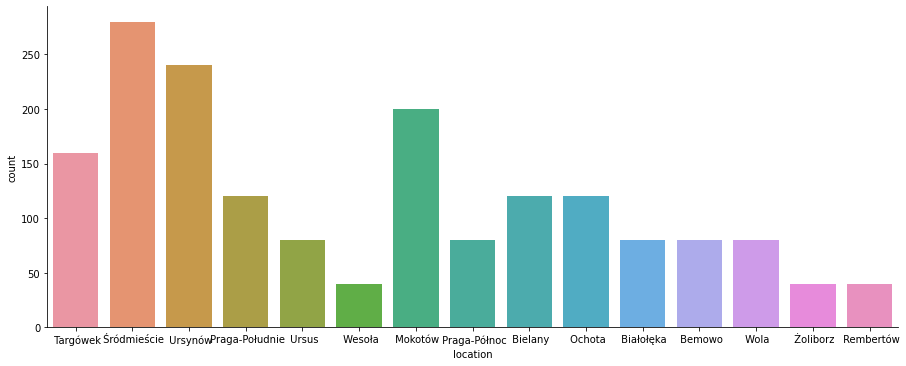

In [ ]:
sns.catplot(x='location', data=df_dane , kind='count', aspect=2.5)

In [ ]:
avg_price = df_dane.groupby('location').mean()
print(avg_price)

                       price
location                    
 Bemowo          2050.000000
 Białołęka       2300.000000
 Bielany         1783.333333
 Mokotów         1720.000000
 Ochota          2366.666667
 Praga-Południe  2166.666667
 Praga-Północ    1799.500000
 Rembertów       1900.000000
 Targówek        1837.500000
 Ursus           1875.000000
 Ursynów         2433.333333
 Wesoła          1600.000000
 Wola            2350.000000
 Śródmieście     2171.428571
 Żoliborz        3500.000000
